<a href="https://colab.research.google.com/github/AaineeSinha/Heart_Disease_Predictor/blob/main/Heart_Disease_Predictior.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()


Saving kaggle (1).json to kaggle (1).json


{'kaggle (1).json': b'{"username":"aaineesinha","key":"14c9fd120e79ed63b827c0628edb71fb"}'}

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle\ \(1\).json ~/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!pip install kaggle

In [6]:
!kaggle datasets download -d redwankarimsony/heart-disease-data

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 36.5MB/s]


In [55]:
!kaggle datasets download -d redwankarimsony/heart-disease-data -p /content/heart-disease --unzip

Dataset URL: https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data
License(s): copyright-authors
  0% 0.00/12.4k [00:00<?, ?B/s]
100% 12.4k/12.4k [00:00<00:00, 29.3MB/s]


In [56]:
import pandas as pd
df = pd.read_csv('/content/heart-disease/heart_disease_uci.csv')



In [57]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [58]:
print(df.columns)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [59]:
df.isnull().sum()

,0
id,0
age,0
sex,0
dataset,0
cp,0
trestbps,59
chol,30
fbs,90
restecg,2
thalch,55


In [14]:
numeric_cols=df.select_dtypes(include='number').columns
df [numeric_cols]= df[numeric_cols].fillna(df[numeric_cols].mean())

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

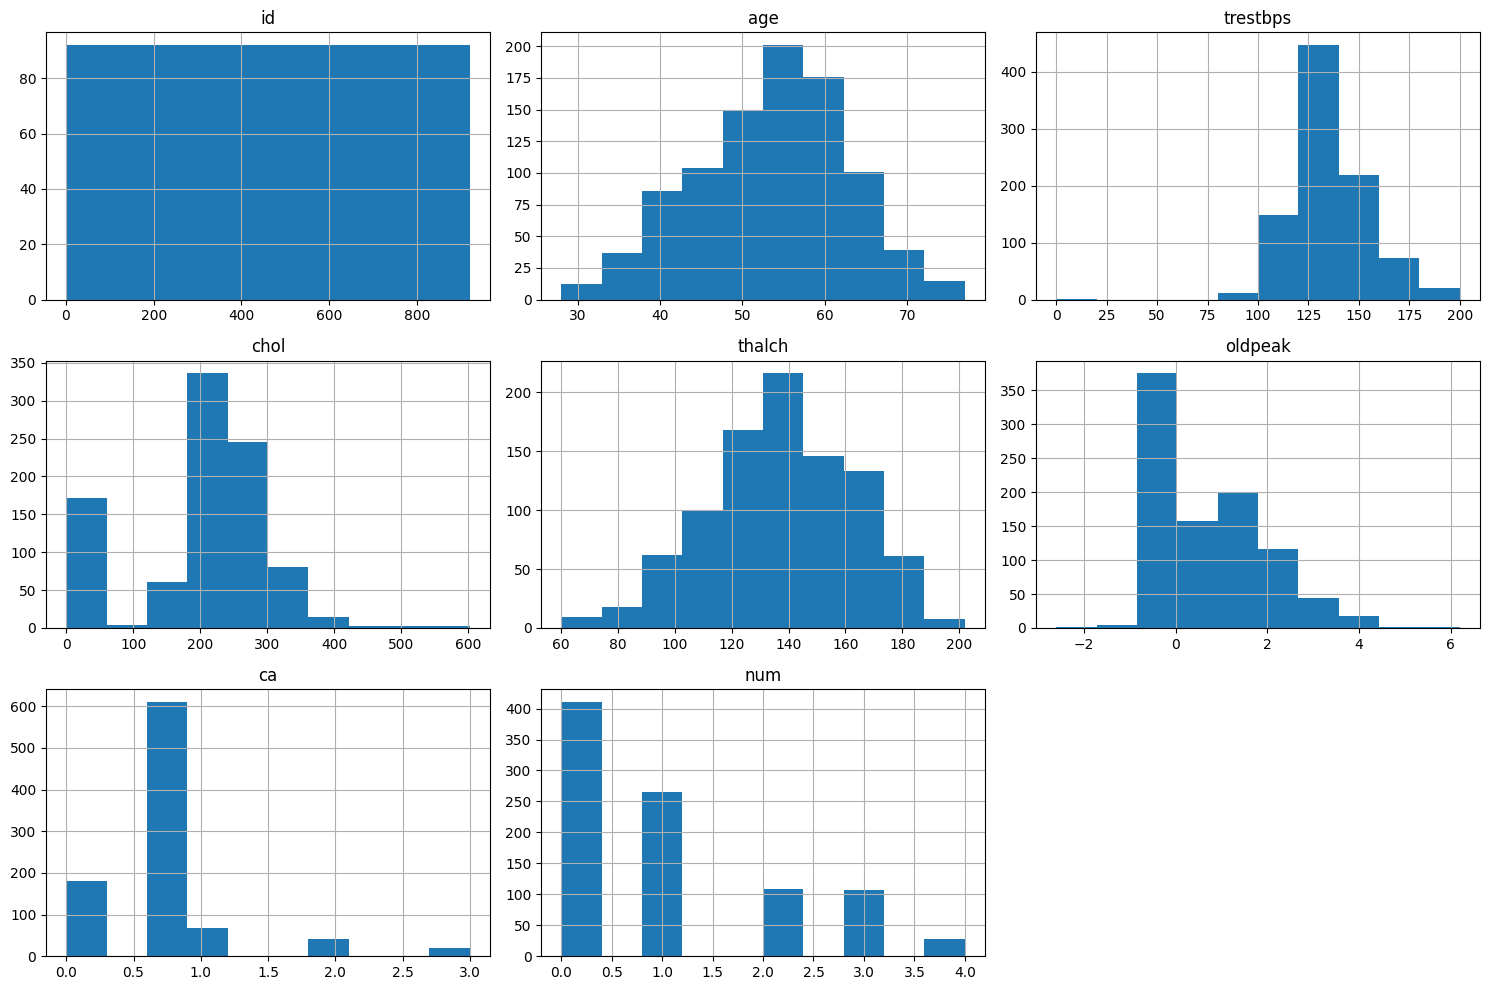

In [16]:
df[numeric_cols].hist(figsize=(15,10))
plt.tight_layout()
plt.show()

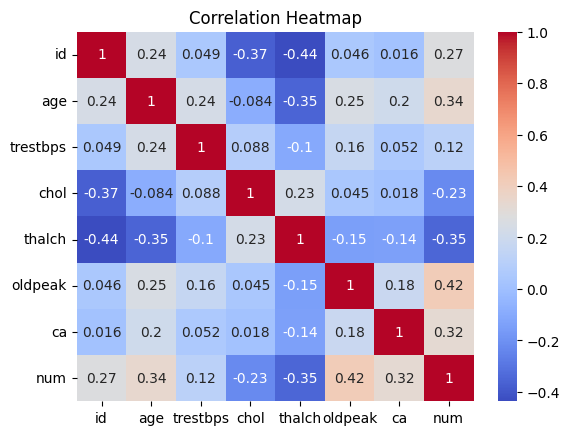

In [17]:
sns.heatmap(df[numeric_cols].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [62]:
#One-hot encode ALL 'object' categorical columns
cat_cols = df.select_dtypes(include='object').columns.tolist()
if 'num' in cat_cols:
    cat_cols.remove('num')  # Don't encode target

In [61]:
X = df.drop('num', axis=1)
y = (df['num'] > 0).astype(int)  # 0: no disease, 1: disease present


In [63]:
X = pd.get_dummies(X, columns=cat_cols)
print("Final feature columns:", X.columns)

Final feature columns: Index(['id', 'age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca',
       'sex_Female', 'sex_Male', 'dataset_Cleveland', 'dataset_Hungary',
       'dataset_Switzerland', 'dataset_VA Long Beach', 'cp_asymptomatic',
       'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina',
       'fbs_False', 'fbs_True', 'restecg_lv hypertrophy', 'restecg_normal',
       'restecg_st-t abnormality', 'exang_False', 'exang_True',
       'slope_downsloping', 'slope_flat', 'slope_upsloping',
       'thal_fixed defect', 'thal_normal', 'thal_reversable defect'],
      dtype='object')


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [24]:
scalar=StandardScaler()
x_train_scaled=scalar.fit_transform(x_train)
x_test_scaled=scalar.transform(x_test)

In [26]:
from sklearn.linear_model import LogisticRegression
lr_model=LogisticRegression()
lr_model.fit(x_train_scaled,y_train)

LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score,classification_report

In [29]:
y_pred=lr_model.predict(x_test_scaled)
print("Logistic Regression Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Logistic Regression Accuracy: 0.842391304347826
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        75
           1       0.88      0.85      0.87       109

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [31]:
from sklearn.metrics import confusion_matrix

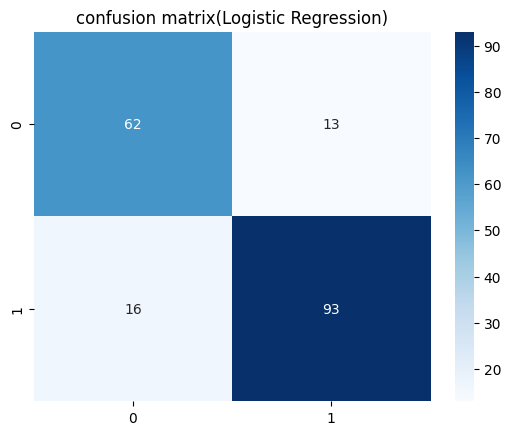

In [32]:
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.title('confusion matrix(Logistic Regression)')
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)
y_pred_rf=rf_model.predict(x_test_scaled)
print("Random Forest Accuracy:",accuracy_score(y_test,y_pred_rf))

Random Forest Accuracy: 0.6032608695652174


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [35]:
print("Random Forest Accuracy:",accuracy_score(y_test,y_pred_rf))


Random Forest Accuracy: 0.6032608695652174


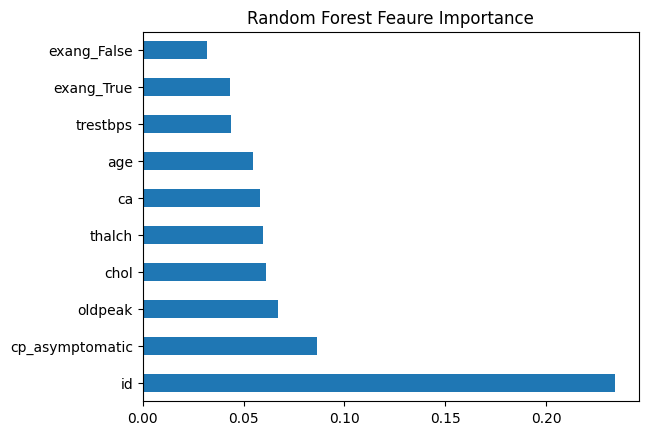

In [37]:
feat_imp=pd.Series(rf_model.feature_importances_,index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')
plt.title('Random Forest Feaure Importance')
plt.show()

In [38]:
import joblib
joblib.dump(rf_model,'heart_disease_rf_model.pkl')
joblib.dump(scalar,'heart_scalar.pkl')

['heart_scalar.pkl']

In [69]:
import joblib
joblib.dump(rf_model,'heart_disease_rf_model.pkl')
joblib.dump(scalar,'heart_scalar.pkl')

['heart_scalar.pkl']

In [67]:
sample = x.head(1)
sample.to_csv('Heart_user_template.csv', index=False)
print("User template saved as 'Heart_user_template.csv'")

User template saved as 'Heart_user_template.csv'


In [68]:
from google.colab import files
files.upload()

Saving heart_dataset.csv to heart_dataset (2).csv


{'heart_dataset (2).csv': b'age,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,sex_Female,sex_Male,cp_asymptomatic,cp_atypical angina,cp_non-anginal,cp_typical angina\n58,130,220,1,normal,150,False,1.4,flat,0,fixed defect,0,1,0,0,0,1\n67,160,276,0,lv hypertrophy,108,True,1.5,flat,3,normal,0,1,1,0,0,0\n42,120,230,0,normal,170,False,1.0,upsloping,0,reversable defect,1,0,0,0,1,0\n50,130,210,0,lv hypertrophy,158,False,0.8,flat,0,normal,0,1,0,0,1,0\n45,114,230,0,normal,165,False,1.1,downsloping,0,normal,1,0,0,1,0,0\n'}

In [70]:
import joblib
import pandas as pd

user_df = pd.read_csv('heart_dataset.csv')

# Get column lists from training dataframe
numeric_cols = df.select_dtypes(include='number').columns.tolist()
cat_cols = df.select_dtypes(include='object').columns.tolist()
bool_cols = df.select_dtypes(include='bool').columns.tolist()

# Drop columns not in user_df to avoid errors
numeric_cols = [col for col in numeric_cols if col in user_df.columns]
cat_cols = [col for col in cat_cols if col in user_df.columns]
bool_cols = [col for col in bool_cols if col in user_df.columns]


# Fill missing values in numeric columns with training set mean
# Need to calculate mean from the original training data (df) not user_df
training_numeric_means = df[numeric_cols].mean()
user_df[numeric_cols] = user_df[numeric_cols].fillna(training_numeric_means)

# Fill missing values in categorical columns with 'Unknown'
for col in cat_cols:
    user_df[col] = user_df[col].fillna('Unknown')

# Convert boolean columns to int
for col in bool_cols:
    user_df[col] = user_df[col].astype(int)


# One-hot encode categorical columns
user_df_encoded = pd.get_dummies(user_df, columns=cat_cols)

# Align columns with training features X.columns
user_df_encoded = user_df_encoded.reindex(columns=X.columns, fill_value=0)

# Scale data
scaler = joblib.load('/content/heart_scalar.pkl')
user_scaled = scaler.transform(user_df_encoded)

# Predict
model = joblib.load('/content/heart_disease_rf_model.pkl')
preds = model.predict(user_scaled)
user_df['Heart_Disease_Prediction'] = preds

print(user_df)

   age  trestbps  chol  fbs         restecg  thalch  exang  oldpeak  \
0   58       130   220    1          normal     150  False      1.4   
1   67       160   276    0  lv hypertrophy     108   True      1.5   
2   42       120   230    0          normal     170  False      1.0   
3   50       130   210    0  lv hypertrophy     158  False      0.8   
4   45       114   230    0          normal     165  False      1.1   

         slope  ca               thal  sex_Female  sex_Male  cp_asymptomatic  \
0         flat   0       fixed defect           0         1                0   
1         flat   3             normal           0         1                1   
2    upsloping   0  reversable defect           1         0                0   
3         flat   0             normal           0         1                0   
4  downsloping   0             normal           1         0                0   

   cp_atypical angina  cp_non-anginal  cp_typical angina  \
0                   0           

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
